In [1]:
from PIL import Image
from torch.autograd import Variable
from torch.optim import RMSprop
from torchvision import transforms

from models import HourGlass
from datasets import NYUDepth
from criterion import RelativeDepthLoss
from train_utils import fit, prep_img, save_checkpoint

In [2]:
path = '/home/austin/data/NYU/'

In [3]:
show_img = transforms.ToPILImage()

In [4]:
train = NYUDepth(path+'train', path+'labels_train.pkl', transforms=transforms.ToTensor())

## Define inputs/outputs
- input is an RGB image
- output is a depth map
- labels are n sets points  (800-nyu, 2-DIW) and the depth relationships between them.
- use ranking loss to penalize model if it gets relationship wrong

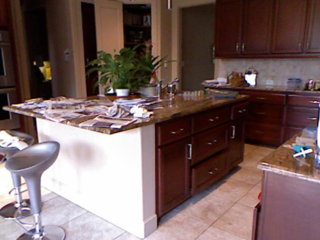

In [5]:
show_img(train[1][0])

In [6]:
train[1][1].keys()

dict_keys(['name', 'x_A', 'y_A', 'x_B', 'y_B', 'ordinal_relation'])

## Model
- Stacked Hourglass Network
- fully convolutional inceptionresnet with upsampling
- only two different inception modules with different sized filters
![title](hourglass_network.png)

- two different inception modules 

In [7]:
hourglass = HourGlass()
hourglass.cuda();

## Train

In [8]:
batch_size = 2

In [9]:
optimizer = RMSprop(hourglass.parameters(), lr=1e-2)
criterion = RelativeDepthLoss()

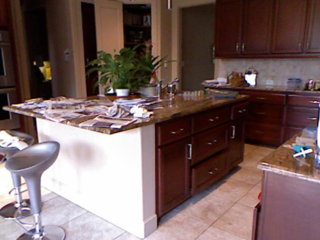

In [10]:
show_img(train[1][0])

Train on 745 samples


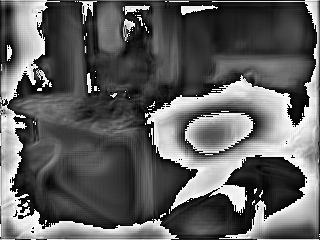

In [11]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


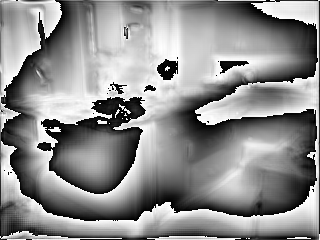

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])


In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

Train on 745 samples


In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=2)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglasst.pth.tar', 12)

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=5)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass1.pth.tar', 12)

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=3)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass1.pth.tar', 15)

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=3)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=1)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=20)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass.pth.tar', 15)

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=20)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_epoch50.pth.tar', 15)

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=20)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_epoch70.pth.tar', 15)

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=20)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_epoch90.pth.tar', 15)

In [ ]:
hourglass.eval()
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=20)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_epoch110.pth.tar', 15)

In [ ]:
history = fit(hourglass, train, criterion, optimizer, batch_size, nb_epoch=20)
out = hourglass(prep_img(train[1][0]))
show_img(out.data.cpu()[0])

In [ ]:
save_checkpoint(hourglass.state_dict(), optimizer.state_dict(), 'hourglass_epoch130.pth.tar', 15)